# **Create a Cryptocurrency Trading Algorithm in Python**

**Cryptocurrency**, commonly known as digital currency, is a type of decentralized digital or virtual currency that uses cryptography to protect financial transactions, manage unit formation, and verify asset transfers. It is based on blockchain technology, which is a distributed ledger maintained by a network of computers. Cryptocurrencies, unlike traditional fiat currencies issued by central banks, are not controlled by any central authority, such as a government or financial organization. Instead, cryptographic techniques are used to safeguard transactions and restrict the generation of new units. Cryptocurrencies have grown in popularity in recent years due to their potential for fast, safe, and transparent transactions, as well as their capacity to bring financial access to unbanked communities. As the world continues to embrace digitization, cryptocurrencies are progressively being integrated into diverse areas like as finance, technology, and commerce, altering the way we perceive and use money.

Trading algorithms are computer programs that assess market data and execute trades automatically according to established rules. They enable traders to make faster and more informed judgments, and they may function 24/7. Trading algorithms are gaining popularity in bitcoin trading due to their efficiency and potential for profit.

In this Project, you will take your first steps into the realm of algorithmic trading by building and testing a simple strategy.

## **Let's Get Started**

We may use Yahoo Finance, a famous website that provides financial news and market quotes, to retrieve bitcoin market data. Fortunately, there is a Python package called `yfinance` that makes it simple to obtain and save this information.

In [1]:
import yfinance as yf

Now let's import the libraries we're going to use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [3]:
# Download BTC-USD price data with a 1 day and 1 hour interval and save the dataframe to a variable.

btc_usd = yf.download("BTC-USD", start='2022-07-05', end='2023-07-05', interval='1d')

BTC_USD = yf.download("BTC-USD", start='2022-07-05', end='2023-07-05', interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
btc_usd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520
2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488
2022-07-09,21716.828125,21877.138672,21445.957031,21592.207031,21592.207031,29641127858


In [5]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-05 00:00:00+00:00,20218.775391,20404.601562,20188.830078,20398.060547,20398.060547,199424000
2022-07-05 01:00:00+00:00,20398.849609,20398.849609,20261.115234,20273.425781,20273.425781,151500800
2022-07-05 02:00:00+00:00,20282.562500,20282.562500,20156.085938,20156.085938,20156.085938,36538368
2022-07-05 03:00:00+00:00,20164.607422,20287.677734,20164.607422,20287.677734,20287.677734,173398016
2022-07-05 04:00:00+00:00,20285.792969,20288.240234,20207.390625,20251.576172,20251.576172,60483584


## Create a Price Chart

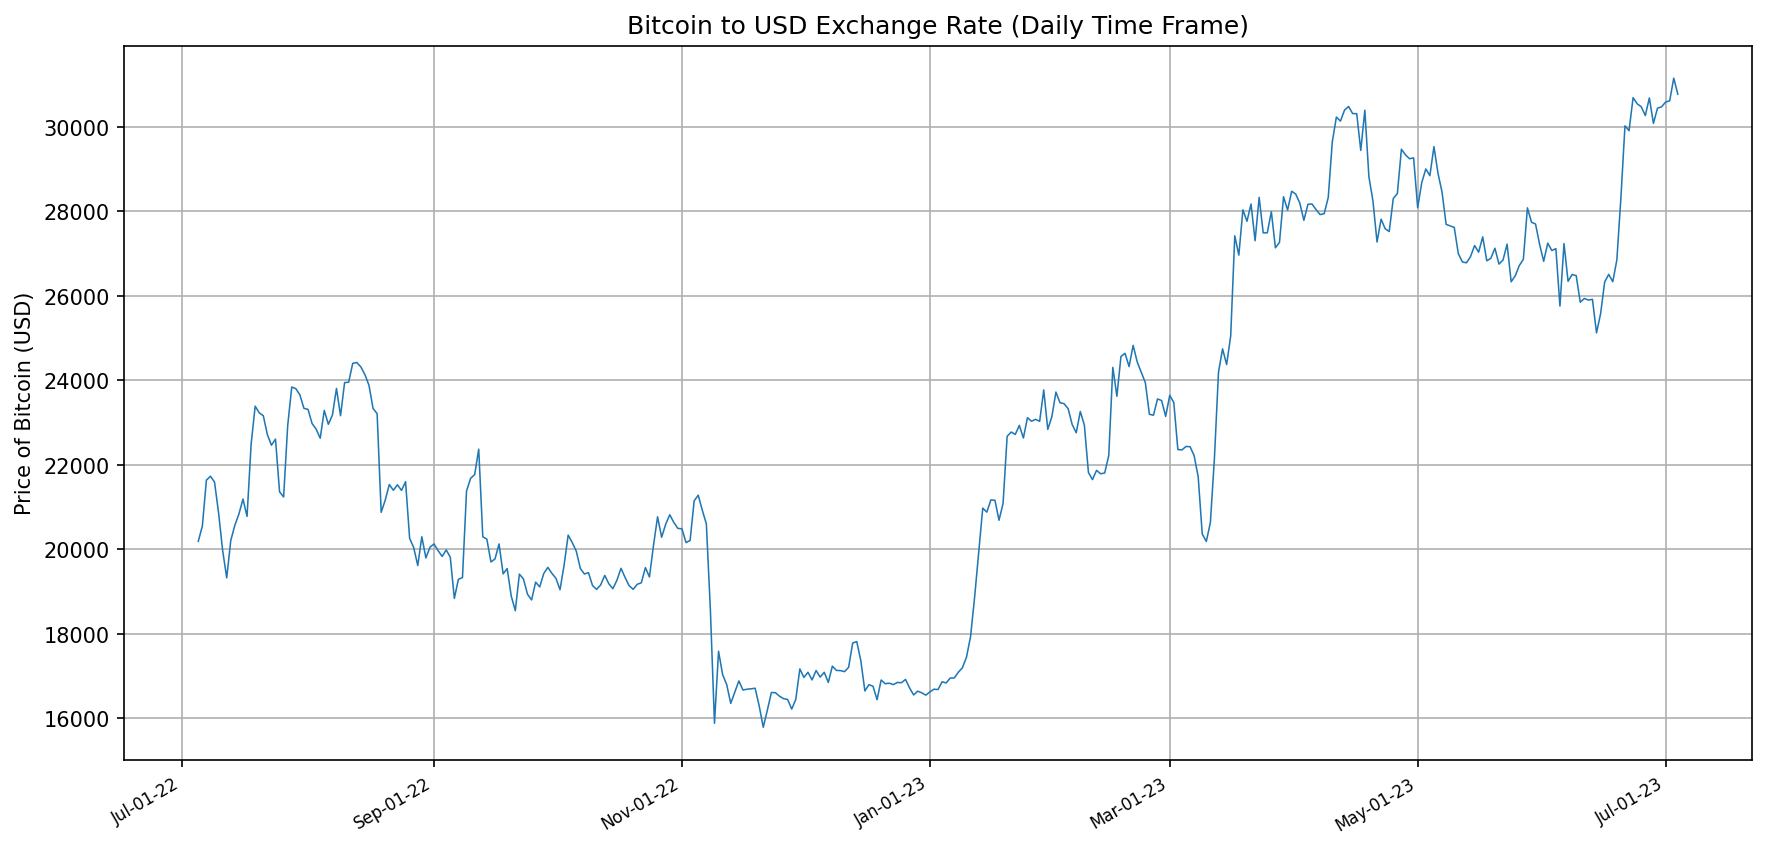

In [6]:
# Price Chart Visualization
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
ax.plot(btc_usd['Close'], lw=0.75)
ax.xaxis.set_major_formatter(DateFormatter("%h-%d-%y"))
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (Daily Time Frame)')
ax.grid(True)
plt.show()


The BTC to USD exchange rate fluctuates between July 5, 2022 and July 5, 2023. Based on preliminary study, a substantial downward trend in the price of Bitcoin may be seen beginning in mid-August 2022 and continuing until the end of the year. However, there has been a constant increasing tendency since the beginning of 2023. 

One helpful strategy for additional study is to use Moving Averages to better identify long-term patterns and reduce the effects of short-term volatility.

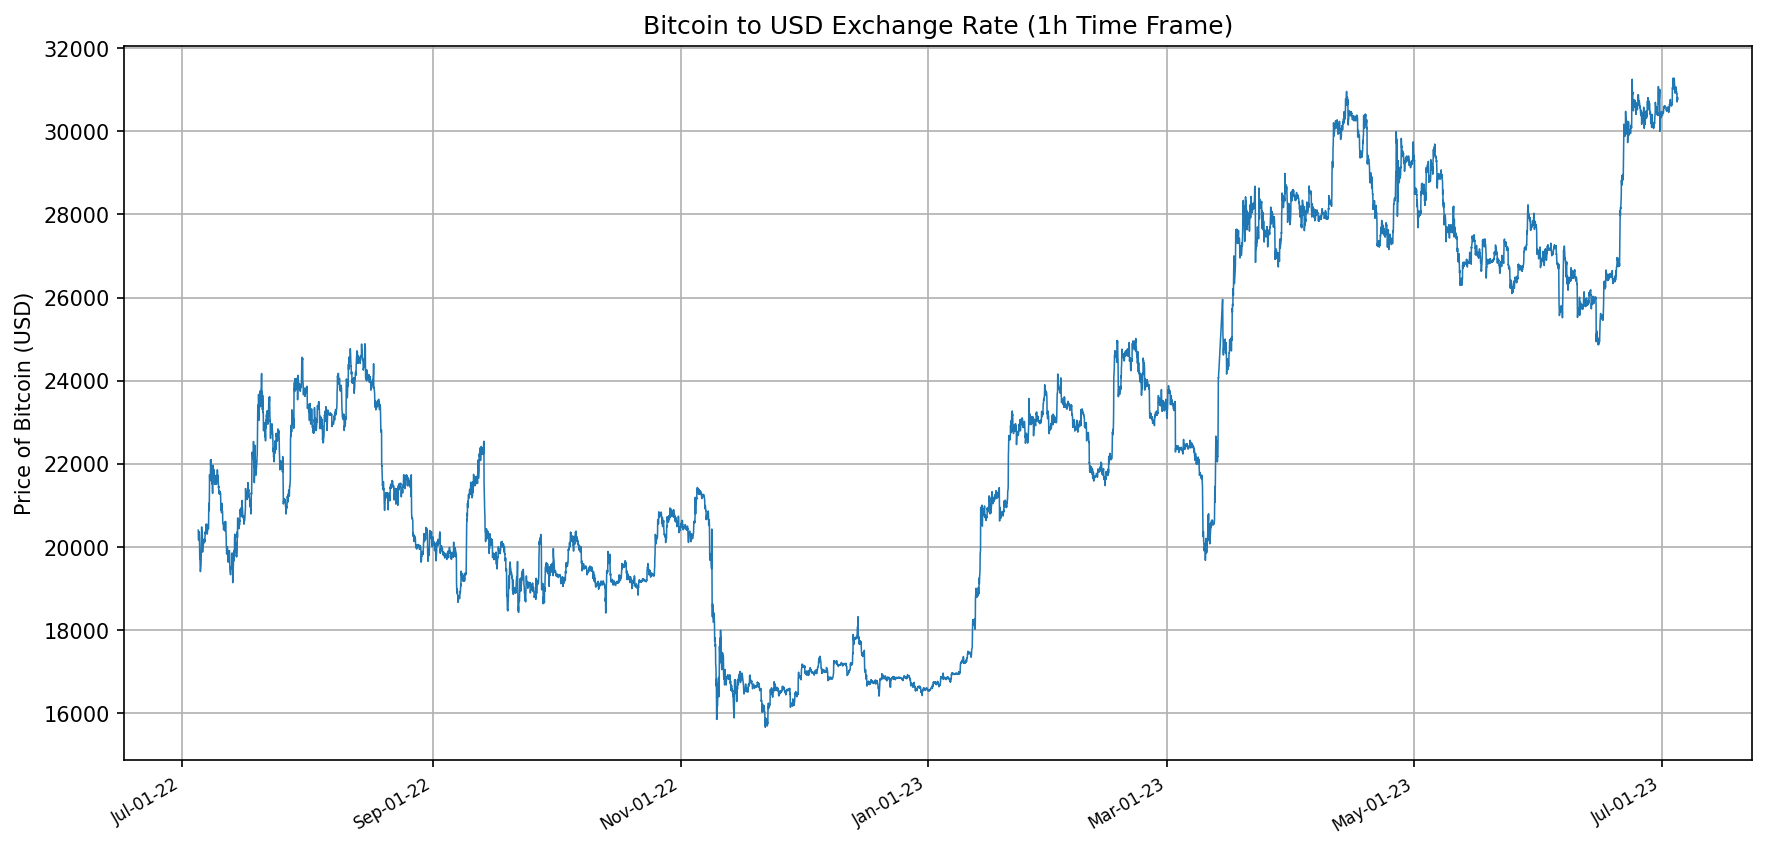

In [7]:
# Price Chart Visualization
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
ax.plot(BTC_USD['Close'], lw=0.75)
ax.xaxis.set_major_formatter(DateFormatter("%h-%d-%y"))
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (1h Time Frame)')
ax.grid(True)
plt.show()

BTC is more volatile in shorter timeframes than in daily timeframes. The same trend pattern, however, is created, namely a price decrease from mid-August 2022 to the end of 2022. From the beginning of 2023 to the present, there has been a significant increase.

## Compute Exponential Moving Averages

In [8]:
# Moving Average Calculation
btc_usd['EMA_50'] = btc_usd['Close'].ewm(span=50, adjust=False).mean()
btc_usd['EMA_200'] = btc_usd['Close'].ewm(span=200, adjust=False).mean()

BTC_USD['EMA_50'] = BTC_USD['Close'].ewm(span=50, adjust=False).mean()
BTC_USD['EMA_200'] = BTC_USD['Close'].ewm(span=200, adjust=False).mean()

## Plot The Exponential Moving Averages

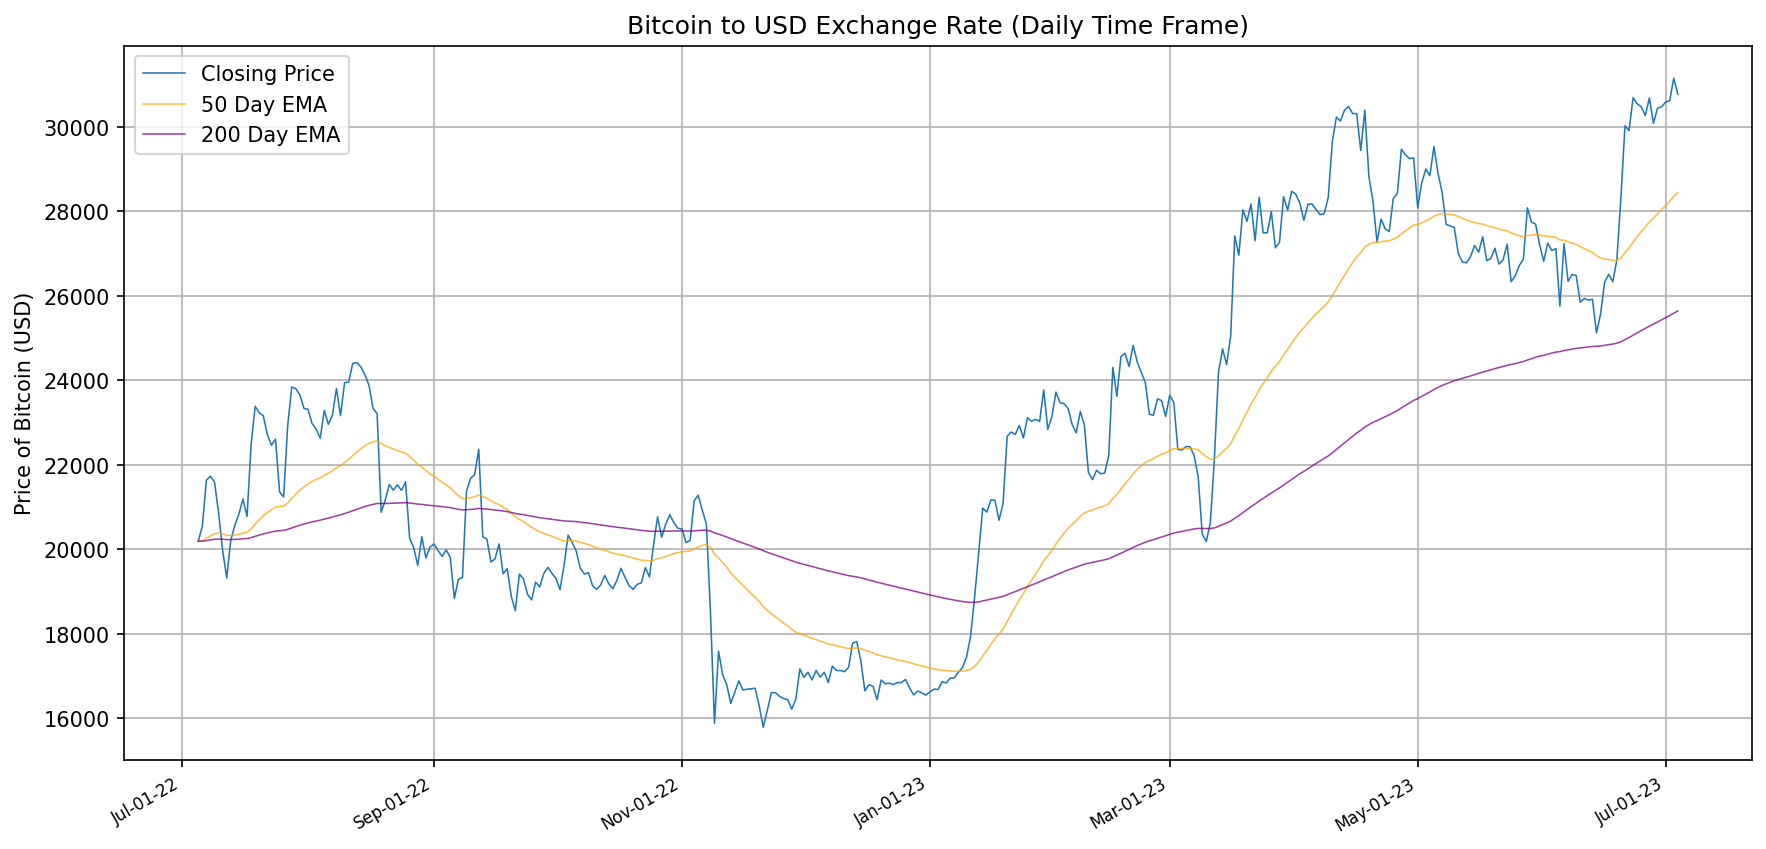

In [9]:
# Moving Average Visualization
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
ax.plot(btc_usd['Close'], lw=0.75, label='Closing Price')
ax.plot(btc_usd['EMA_50'], lw=0.75, color='orange', alpha=0.75, label='50 Day EMA')
ax.plot(btc_usd['EMA_200'], lw=0.75, color='purple', alpha=0.75, label='200 Day EMA')
ax.xaxis.set_major_formatter(DateFormatter("%h-%d-%y"))
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (Daily Time Frame)')
ax.grid(True)
ax.legend()
plt.show()

The use of Exponential Moving Average (EMA) indicators to visualize Bitcoin's price chart, notably EMA 50 and EMA 200, provides important insights into the cryptocurrency's long-term patterns and prospective trading opportunities.

The EMA 50 and EMA 200 are popular indicators for smoothing out market swings and identifying substantial price movements. The EMA 50 reflects the average price of Bitcoin over the last 50 days, while the EMA 200 represents the average price over the last 200 days.

The intersection points of the EMA 50 and EMA 200 on the price chart can suggest possible trend changes. If the EMA 50 line crosses over the EMA 200 line, it indicates a bullish signal, signaling a possible uptrend in the price of Bitcoin. If the EMA 50 line crosses below the EMA 200 line, it represents a bearish signal, indicating the possibility of a downturn.


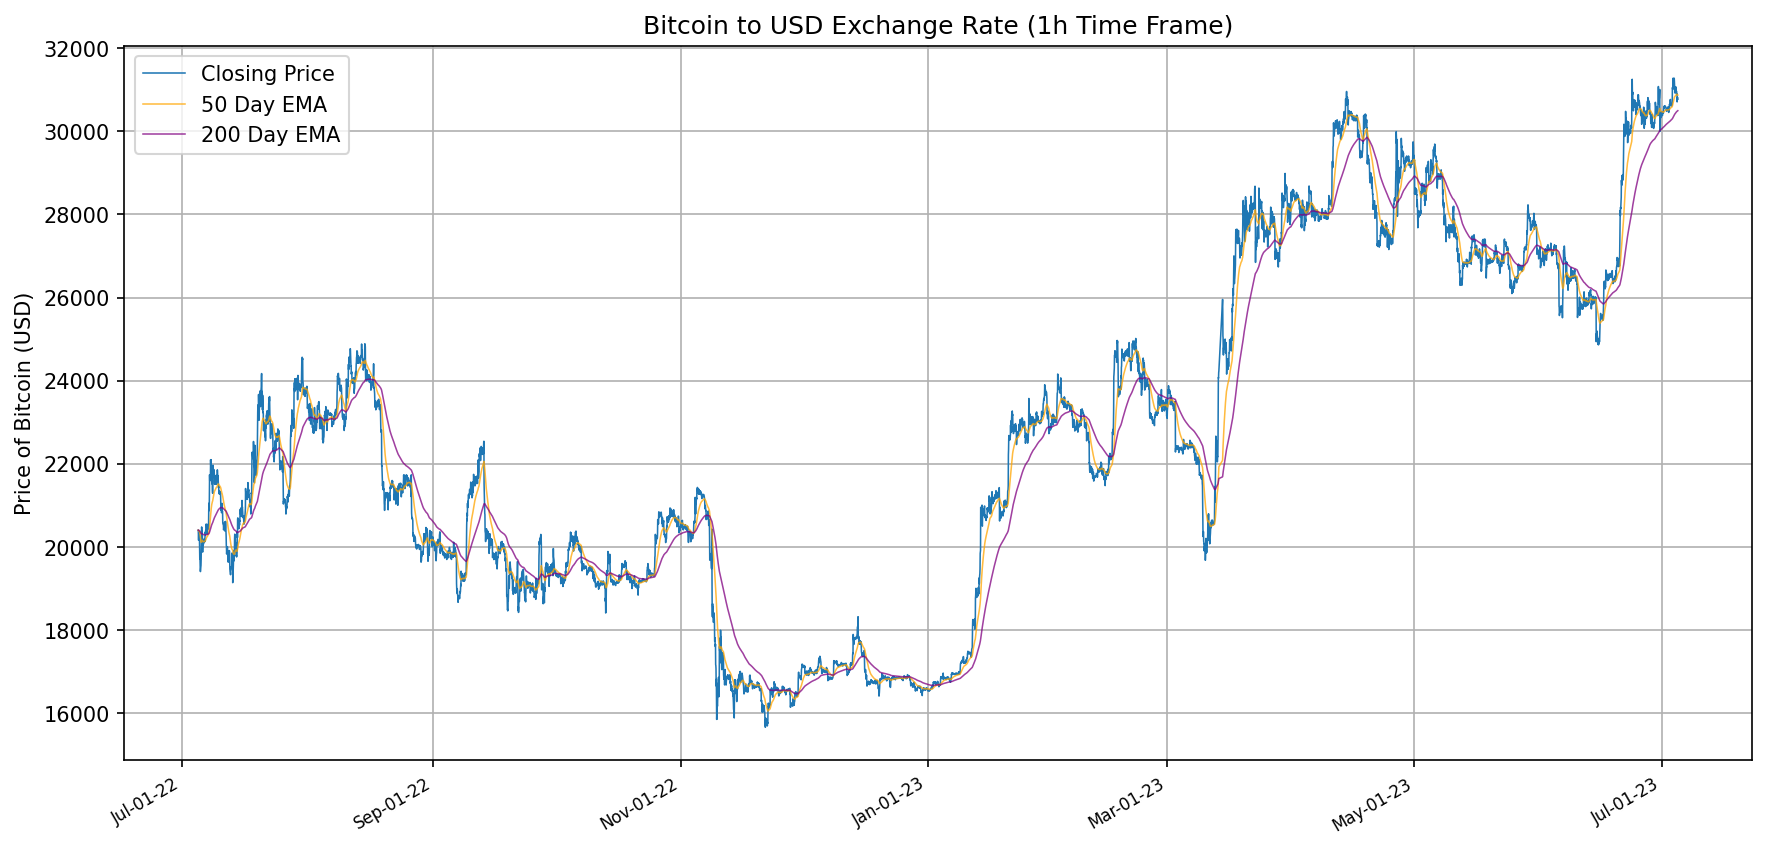

In [10]:
# Moving Average Visualization
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')
ax.plot(BTC_USD['EMA_50'], lw=0.75, color='orange', alpha=0.75, label='50 Day EMA')
ax.plot(BTC_USD['EMA_200'], lw=0.75, color='purple', alpha=0.75, label='200 Day EMA')
ax.xaxis.set_major_formatter(DateFormatter("%h-%d-%y"))
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (1h Time Frame)')
ax.grid(True)
ax.legend()
plt.show()

## Create EMA Strategy

The Moving Average Crossover is one of the most basic trading strategies that makes use of Simple Moving Averages. This technique is based on the use of two Simple Moving Averages, one with a relatively short sampling time and the other with a larger interval. When the shorter moving average crosses over the longer interval moving average, this can indicate a trend reversal. For example, if the shorter term moving average is lower than the longer term moving average but subsequently crosses above it, this may indicate the start of an upward (bullish) trend. This would be a _buy_ signal using the **_Moving Average Crossover_** technique. Similarly, when the shorter moving average is higher than the longer period one and crosses below, it may indicate a downward (bearish) trend, which would be a _sell_ signal in this method.

We apply the EMA (Exponential Moving Average) in this method to give more weight to recent price movements. As a result, the EMA is more responsive to recent price movements and is frequently utilized in short-term trading analysis.

In [11]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals_1 = pd.DataFrame(index=btc_usd.index)
trade_signals_2= pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Exponential Moving Averages (in days)
short_interval = 13
long_interval = 21

# Compute the Exponential Moving Averages and add them to the dataframe as new columns
trade_signals_1['Short'] = btc_usd['Close'].ewm(span=short_interval, adjust=False).mean()
trade_signals_1['Long'] = btc_usd['Close'].ewm(span=long_interval, adjust=False).mean()

trade_signals_2['Short'] = BTC_USD['Close'].ewm(span=short_interval, adjust=False).mean()
trade_signals_2['Long'] = BTC_USD['Close'].ewm(span=long_interval, adjust=False).mean()

In [12]:
# Create a new column populated with zeros
trade_signals_1['Signal'] = 0.0
trade_signals_2['Signal'] = 0.0

# Wherever the Shorter term EMA is above the Longer term EMA, set the Signal column to 1, otherwise 0
trade_signals_1['Signal'] = np.where(trade_signals_1['Short'] > trade_signals_1['Long'], 1.0, 0.0)
trade_signals_2['Signal'] = np.where(trade_signals_2['Short'] > trade_signals_2['Long'], 1.0, 0.0)

In [13]:
trade_signals_1['Position'] = trade_signals_1['Signal'].diff()

trade_signals_2['Position'] = trade_signals_2['Signal'].diff()

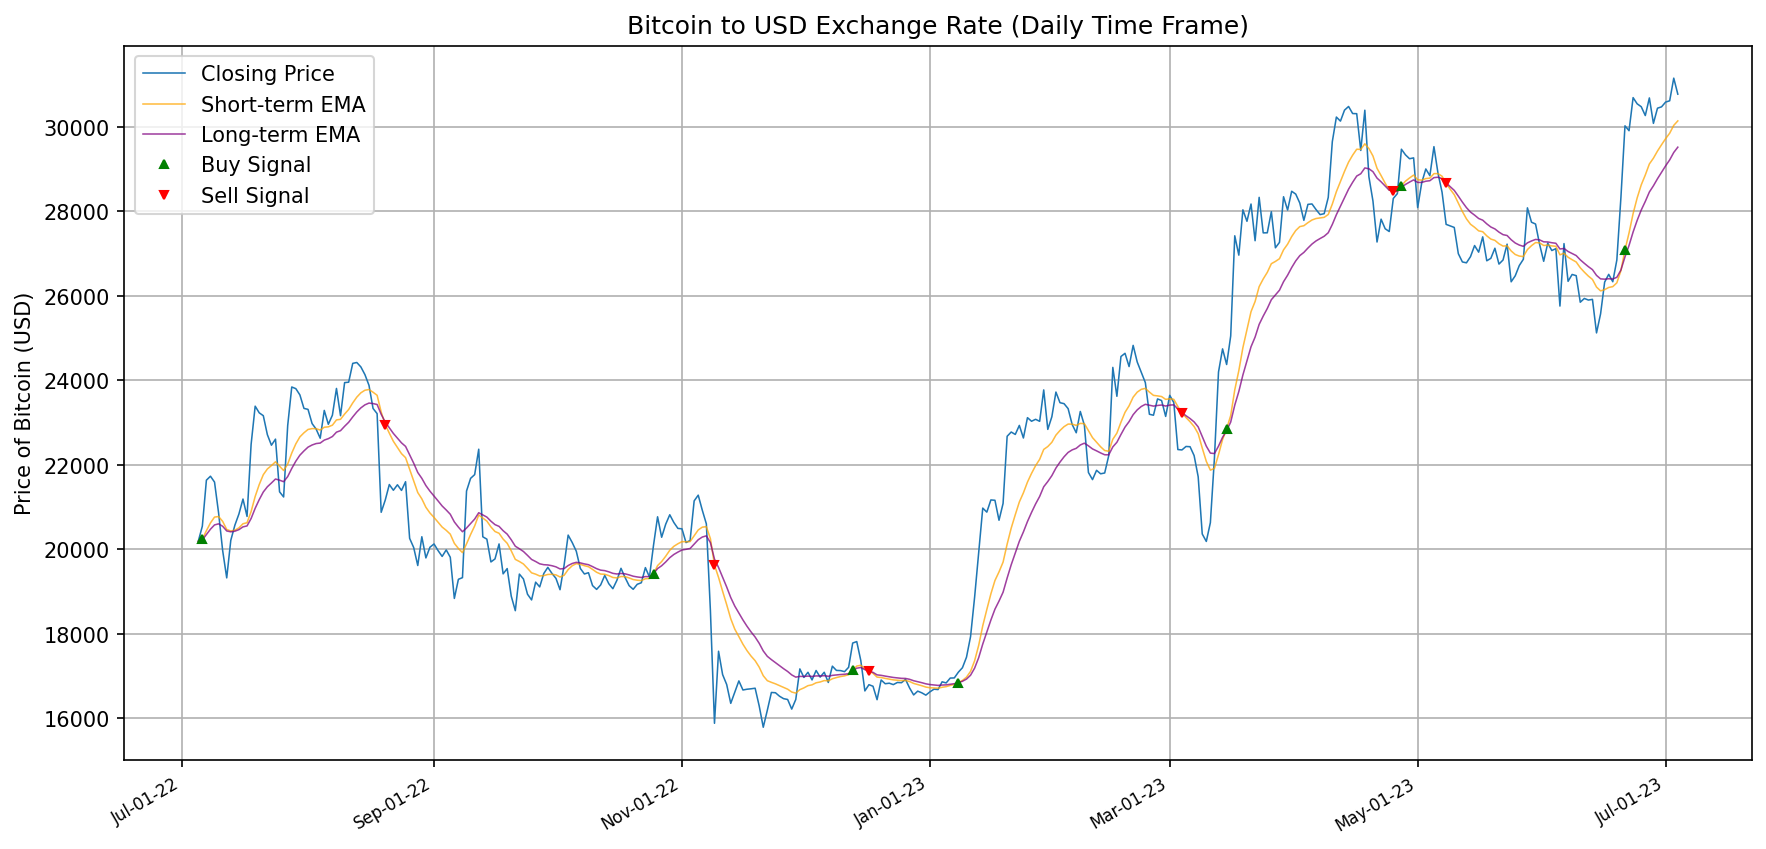

In [14]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(btc_usd['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term exponential moving average
ax.plot(trade_signals_1['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term EMA')

# Plot the longer-term exponential moving average
ax.plot(trade_signals_1['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term EMA')

# Adding green arrows to indicate buy orders
ax.plot(trade_signals_1.loc[trade_signals_1['Position'] == 1.0].index, trade_signals_1.Short[trade_signals_1['Position'] == 1.0],
        '^', markersize=4, linestyle='none', color='green', label='Buy Signal')

# Adding red arrows to indicate sell orders
ax.plot(trade_signals_1.loc[trade_signals_1['Position'] == -1.0].index, trade_signals_1.Short[trade_signals_1['Position'] == -1.0],
        'v', markersize=4, linestyle='none', color='red', label='Sell Signal')

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (Daily Time Frame)')
ax.grid(True)
ax.legend()

# Displaying the price chart
plt.show()

With a quick glance it looks like our algorithm appears to be functioning properly. It appears to have purchased Bitcoin at a low price and then sold it at a higher price. Feel free to experiment with the'short_interval' and 'long_interval' variables to see how they affect things. For the time being, we'll stick with the parameters we have and run some quantitative analysis to evaluate how our algorithm fared.





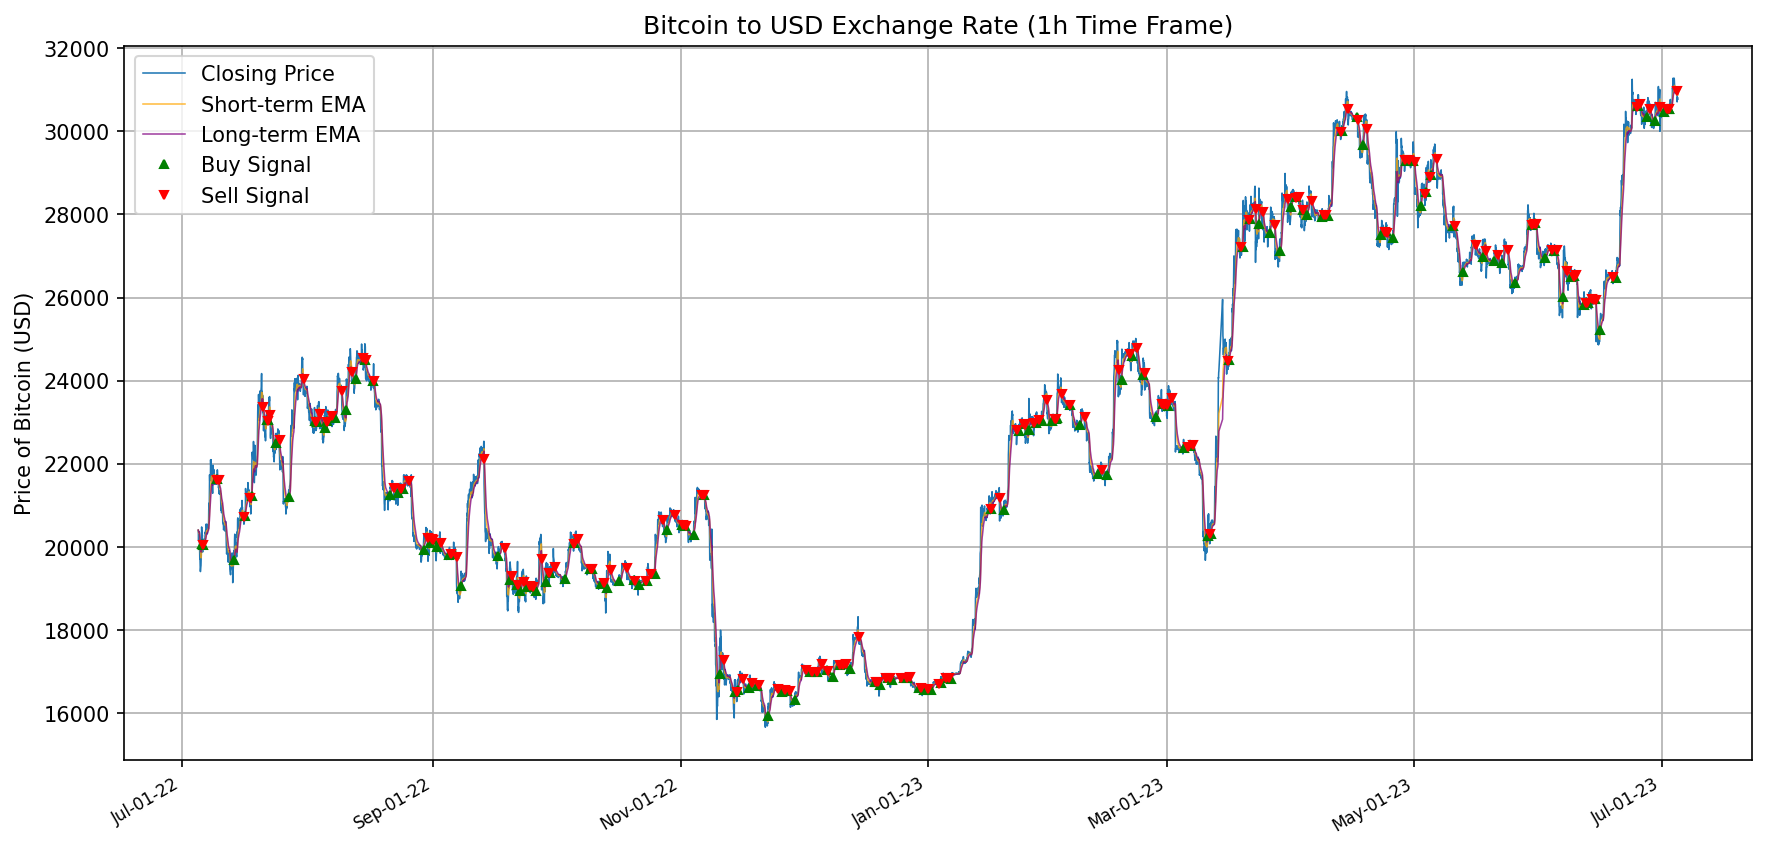

In [15]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term exponential moving average
ax.plot(trade_signals_2['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term EMA')

# Plot the longer-term exponential moving average
ax.plot(trade_signals_2['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term EMA')

# Adding green arrows to indicate buy orders
ax.plot(trade_signals_2.loc[trade_signals_2['Position'] == 1.0].index, trade_signals_2.Short[trade_signals_2['Position'] == 1.0],
        '^', markersize=4, linestyle='none', color='green', label='Buy Signal')

# Adding red arrows to indicate sell orders
ax.plot(trade_signals_2.loc[trade_signals_2['Position'] == -1.0].index, trade_signals_2.Short[trade_signals_2['Position'] == -1.0],
        'v', markersize=4, linestyle='none', color='red', label='Sell Signal')

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate (1h Time Frame)')
ax.grid(True)
ax.legend()

# Displaying the price chart
plt.show()

The image above depicts the use of the exponential moving average technique on a one-hour time period. It is clear that the algorithm performs a large number of transactions in the short run.

## Create Backtest Strategy

Once you've created a trading algorithm, you'll want to test it to see if it can truly generate a profit and compare its performance to other techniques. Often, the initial step is to do a backtest.The basic idea behind a backtest is to simulate running your trading algorithm on past data and compute measures like return. While this method does not imply that the algorithm will be consistently lucrative, it provides a quick way to examine the viability of a strategy and discard manifestly unfeasible alternatives.

In [16]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0  # ten thousand USD

# Create dataframe containing all the dates considered
backtest_1 = pd.DataFrame(index=trade_signals_1.index)
backtest_2 = pd.DataFrame(index=trade_signals_2.index)

# Add column containing the daily percent returns of Bitcoin
backtest_1['btc_Return'] = btc_usd['Close'] / btc_usd['Close'].shift(1)  # Current closing price / yesterday's closing price
backtest_2['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1)  # Current closing price / yesterday's closing price

To compute the daily returns of the trading algorithm, consider that our portfolio is either totally invested in Bitcoin or entirely invested in USD at any given time. This means that whenever the algorithm is holding Bitcoin, its daily returns are the same as Bitcoin's daily returns. When the algorithm is holding USD, its returns are completely independent on Bitcoin price swings. As a result, when holding USD, the portfolio's value remains unchanged during that time period. We'll also make the simplistic assumption that we can execute zero-commission deals. This argument is condensed into the lines of code below.

In [17]:
# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest_1['Alg_Return'] = np.where(trade_signals_1['Signal'] == 1, backtest_1['btc_Return'], 1.0)
backtest_2['Alg_Return'] = np.where(trade_signals_2['Signal'] == 1, backtest_2['BTC_Return'], 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest_1['Portfolio Value'] = initial_balance * backtest_1['Alg_Return'].cumprod()  # cumulative product
backtest_2['Portfolio Value'] = initial_balance * backtest_2['Alg_Return'].cumprod()  # cumulative product

Let's make a graph that compares the performance of our trading algorithm to that of a simple "Buy and Hold" strategy that will serve as a baseline. Plot of portfolio values over the last year using one of the strategies.

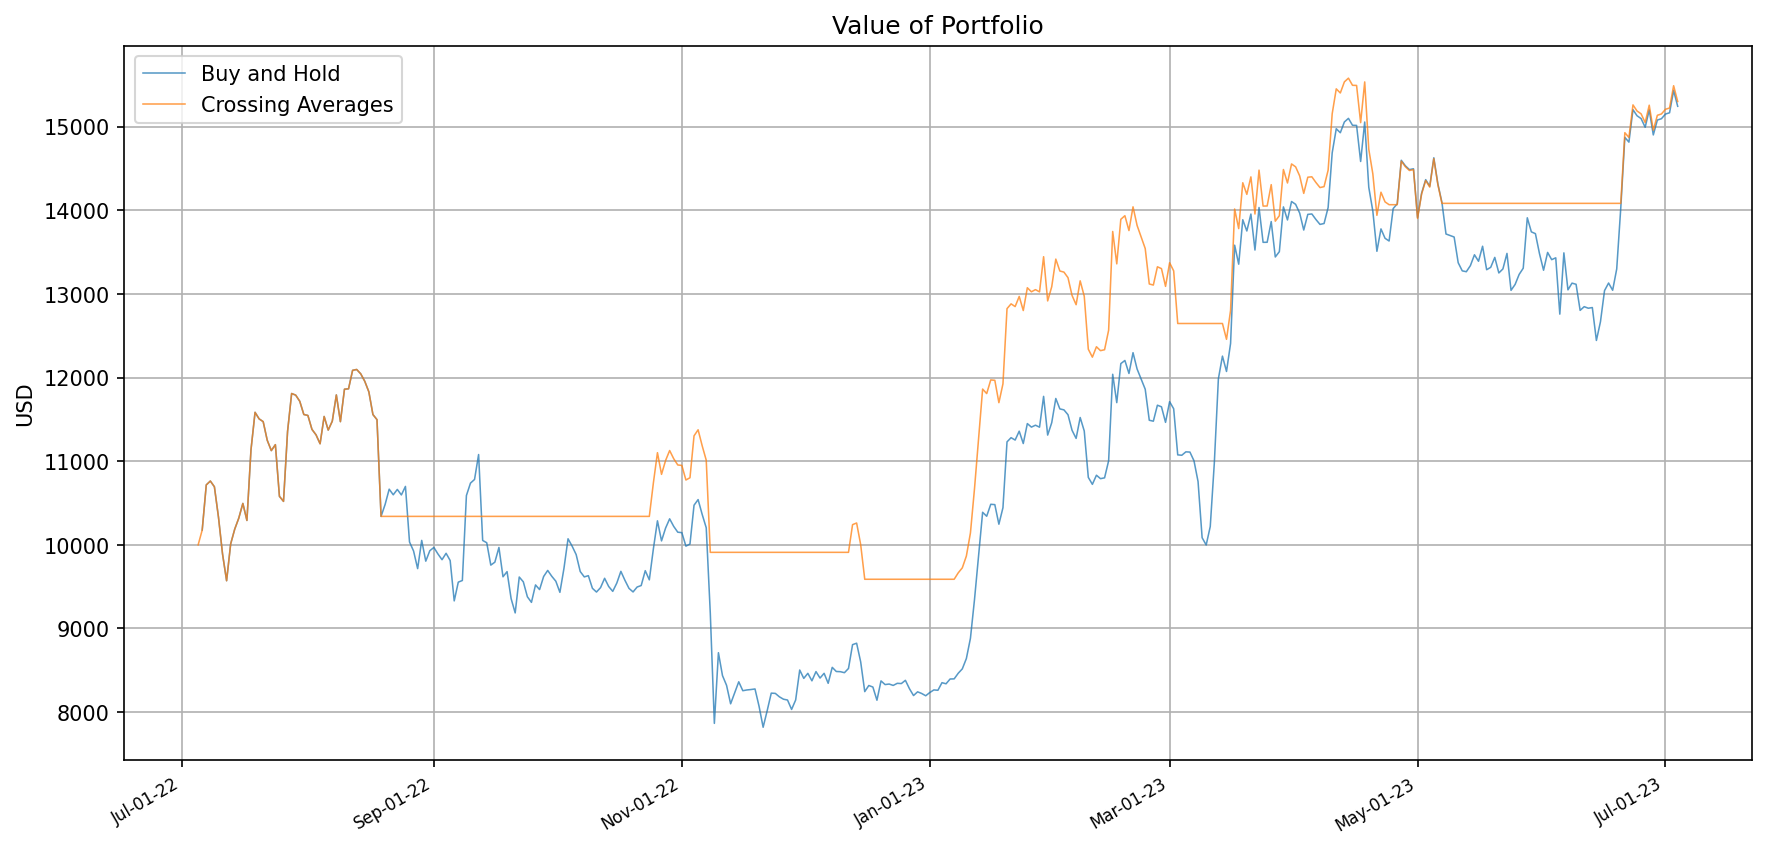

In [18]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance * backtest_1['btc_Return'].cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting the total value of Crossing Averages Strategy
ax.plot(backtest_1['Portfolio Value'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid()  # adding a grid
ax.legend()  # adding a legend

# Displaying the price chart
plt.show()

The plot shows that both strategies produce a very high return on investment. Obviously, this is due to the growth in the price of Bitcoin earlier this year, and you should not expect comparable profits in the future.

Nonetheless, it's reassuring to discover that the trading algorithm appears to be adequate, even going beyond the fundamental Buy and Hold approach. The plot clearly shows the periods when all of the algorithms are using Bitcoin and when they are holding USD.

In [19]:
final_portfolio_value = backtest_1['Portfolio Value'].iloc[-1]
print("Final Portfolio Value Using Daily Time Frame: $", final_portfolio_value)

Final Portfolio Value Using Daily Time Frame: $ 15301.223069160136


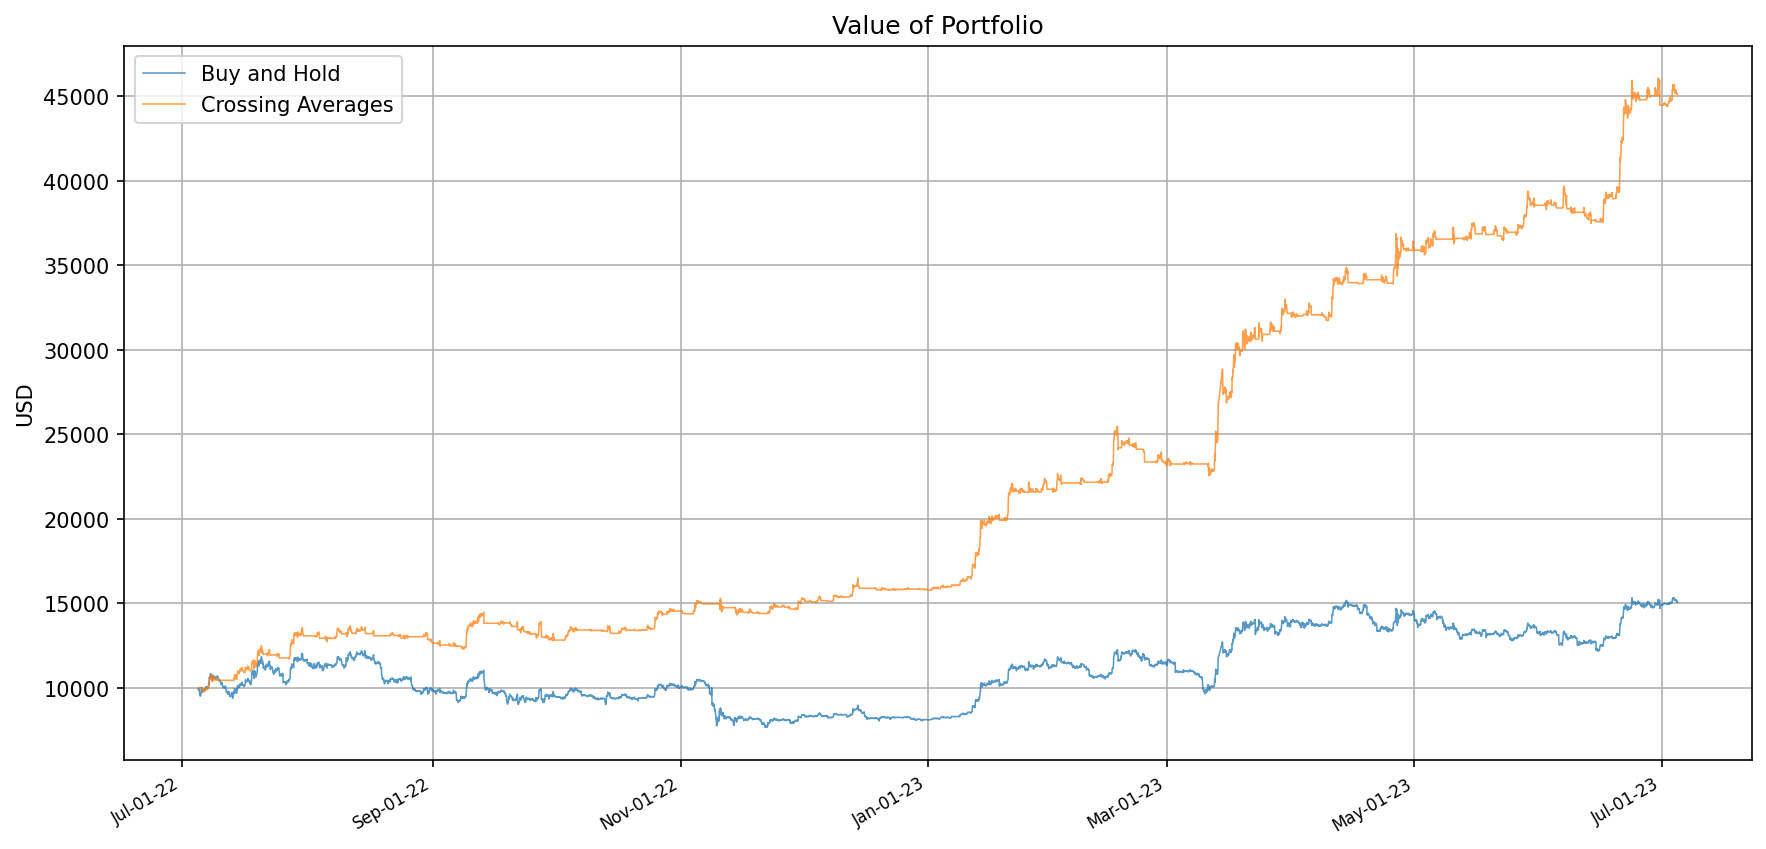

In [20]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance * backtest_2['BTC_Return'].cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting the total value of Crossing Averages Strategy
ax.plot(backtest_2['Portfolio Value'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid()  # adding a grid
ax.legend()  # adding a legend

# Displaying the price chart
plt.show()

The image above shows that the backtesting results on the 1 hour timeframe outperform the daily timeframe when utilizing the algorithm settings that we use.

In [21]:
final_portfolio_value = backtest_2['Portfolio Value'].iloc[-1]
print("Final Portfolio Value Using 1 Hour Time Frame: $", final_portfolio_value)

Final Portfolio Value Using 1 Hour Time Frame: $ 45138.15134029707


### A Word of Caution

Backtesting is a valuable method for assessing trading strategy viability, but it carries risks. Fine-tuning techniques using configurable parameters, like moving averages, on historical data can lead to overfitting and poor performance on new data. To avoid losses and protect your ego, it's wise to forward test successful algorithms. This involves using real-time data with simulated money to evaluate how the method would perform in real-world scenarios. If the testing goes well, you can gain confidence and consider investing real money.